In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("Car Sales Data.csv")
df.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


### DATA WRANGLING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [66]:
df.shape[0]

23906

In [68]:
df.shape[1]

17

In [70]:
df["Date"].unique()[:20]

array(['1/2/2022', '1/3/2022', '1/4/2022', '1/5/2022', '1/6/2022',
       '1/9/2022', '1/10/2022', '1/12/2022', '1/13/2022', '1/17/2022',
       '1/19/2022', '1/21/2022', '1/23/2022', '1/24/2022', '1/26/2022',
       '1/27/2022', '1/28/2022', '1/30/2022', '1/31/2022', '2/3/2022'],
      dtype=object)

In [72]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print('Number of parsing failures:', df['Date'].isna().sum())

print("Earliest date:", df['Date'].min())
print("Latest date:", df['Date'].max())

print("Is the Date column sorted?:", df["Date"].is_monotonic_increasing)

Number of parsing failures: 0
Earliest date: 2022-01-02 00:00:00
Latest date: 2023-12-31 00:00:00
Is the Date column sorted?: True


In [74]:
print(df["Date"].dtype)

datetime64[ns]


In [76]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_Group'],
      dtype='object')

In [78]:
# cheking Objects Data Format
categorical_cols = ['Car_id', 'Customer Name', 'Gender',
                    'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 
                    'Dealer_No ', 'Body Style', 'Dealer_Region']
for col in categorical_cols:
    print(col, df[col].nunique(), "unique values")
    print(df[col].unique()[:10])

Car_id 23906 unique values
['C_CND_000001' 'C_CND_000002' 'C_CND_000003' 'C_CND_000004'
 'C_CND_000005' 'C_CND_000006' 'C_CND_000007' 'C_CND_000008'
 'C_CND_000009' 'C_CND_000010']
Customer Name 3021 unique values
['Geraldine' 'Gia' 'Gianna' 'Giselle' 'Grace' 'Guadalupe' 'Hailey'
 'Graham' 'Naomi' 'Grayson']
Gender 2 unique values
['Male' 'Female']
Dealer_Name 28 unique values
["Buddy Storbeck's Diesel Service Inc" 'C & M Motors Inc' 'Capitol KIA'
 'Chrysler of Tri-Cities' 'Chrysler Plymouth' 'Classic Chevy'
 'Clay Johnson Auto Sales' 'U-Haul CO' 'Rabun Used Car Sales'
 'Race Car Help']
Company 30 unique values
['Ford' 'Dodge' 'Cadillac' 'Toyota' 'Acura' 'Mitsubishi' 'Chevrolet'
 'Nissan' 'Mercury' 'BMW']
Model 154 unique values
['Expedition' 'Durango' 'Eldorado' 'Celica' 'TL' 'Diamante' 'Corolla'
 'Galant' 'Malibu' 'Escort']
Engine 2 unique values
['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
Transmission 2 unique values
['Auto' 'Manual']
Color 3 unique values
['Black' 'Red' 'P

In [80]:
df["Engine"] = df["Engine"].str.replace('Â','', regex=False).str.replace('\xa0',' ', regex=False)

In [82]:
df["Engine"].unique()

array(['Double Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [84]:
numeric_cols = ['Annual Income','Price ($)','Phone']
print(df[numeric_cols].dtypes)

Annual Income    int64
Price ($)        int64
Phone            int64
dtype: object


In [86]:
for col in ["Annual Income","Price ($)"]:
    df[col] = df[col].astype(float)

In [88]:
print(df[numeric_cols].dtypes)

Annual Income    float64
Price ($)        float64
Phone              int64
dtype: object


In [32]:
df.head(10)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500.0,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000.0,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000.0,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000.0,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000.0,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500.0,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000.0,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500.0,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,2022-01-02,Guadalupe,Male,850000.0,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000.0,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,2022-01-02,Hailey,Male,1600000.0,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000.0,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,2022-01-02,Graham,Male,13500.0,U-Haul CO,Mitsubishi,Galant,Double Overhead Camshaft,Auto,Pale White,42000.0,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,2022-01-02,Naomi,Male,815000.0,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000.0,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,2022-01-02,Grayson,Female,13500.0,Rabun Used Car Sales,Ford,Escort,Double Overhead Camshaft,Auto,Pale White,15000.0,85257-3102,Passenger,7836892,Scottsdale


In [34]:
for col in ["Annual Income","Price ($)"]:
    print(col, "negative values:", (df[col] < 0).sum())

Annual Income negative values: 0
Price ($) negative values: 0


In [36]:
print("Duplicate Rows:", df.duplicated(subset = ["Car_id", "Date", "Customer Name"]).sum())

Duplicate Rows: 0


### EXPLORATORY DATA ANALYSIS (EDA)

In [47]:
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print("\n")

--- Car_id ---
Car_id
C_CND_000001    1
C_CND_015935    1
C_CND_015944    1
C_CND_015943    1
C_CND_015942    1
               ..
C_CND_007967    1
C_CND_007966    1
C_CND_007965    1
C_CND_007964    1
C_CND_023906    1
Name: count, Length: 23906, dtype: int64


--- Customer Name ---
Customer Name
Thomas           92
Emma             90
Lucas            88
Nathan           80
Louis            76
                 ..
Adelin            1
Zakarya           1
Paule             1
Noeline           1
Djamel Epoine     1
Name: count, Length: 3021, dtype: int64


--- Gender ---
Gender
Male      18798
Female     5108
Name: count, dtype: int64


--- Dealer_Name ---
Dealer_Name
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1251
Star Enterprises Inc                               1249
Tri-State Mack Inc                           

#### A. Customer Insights

#### Annual Income vs Gender

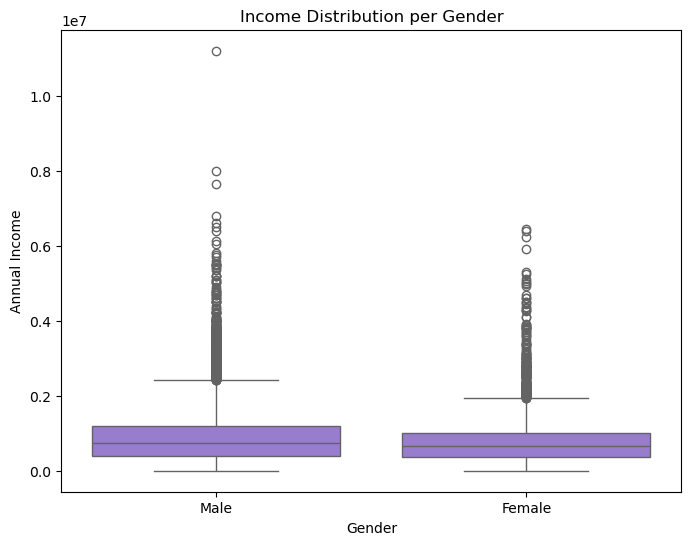

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Gender", y="Annual Income", data=df, color="mediumpurple")
plt.title("Income Distribution per Gender")
plt.show()

#### Income Distribution per Region

##### Feature Engineering

In [51]:
df["Income_Group"] = pd.qcut(df["Annual Income"], q=3, labels=["Low", "Medium", "High"])
df["Income_Group"].head(5)

0     Low
1    High
2    High
3     Low
4    High
Name: Income_Group, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

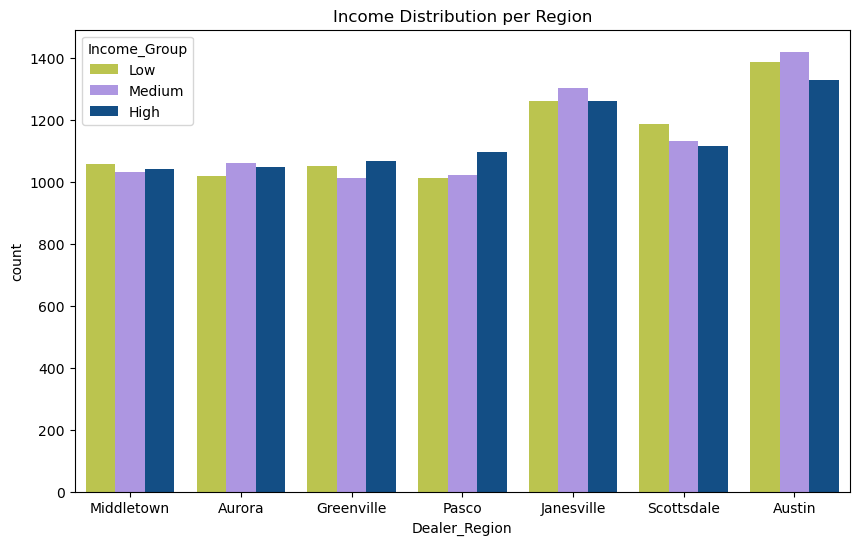

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Dealer_Region", hue="Income_Group", palette=['#CBD83B', '#A88AED', '#004E98'])
plt.title("Income Distribution per Region")
plt.show()

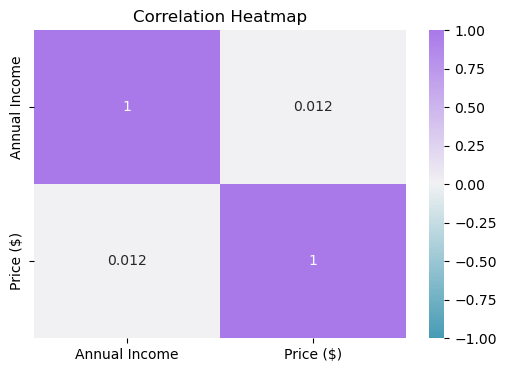

In [55]:
num_cols = ["Annual Income", "Price ($)"]
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap = sns.diverging_palette(220, 280, s=80, l=60, as_cmap=True), vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Insights:
1. Male customers tend to have slightly higher income than female
2. Austin has the largest customer base accross all income segments, this indicates Austin is the strongest sales region, both volume and purchasing volume (focus: brand awereness & loyalty)
3. Janesvilles ranks second, good for diversified products (promotion focus to value for money & financing offers)
4. Other regions show smaller but balanced distribution - possibly for supporting markets or dealer expansion
5. Price and income show weak correlation (p = 0.012), suggesting that income is not solely affected car purchase decisions

#### B. Market Insights: Product & Brand

#### Top 10 Most Sold Car Models

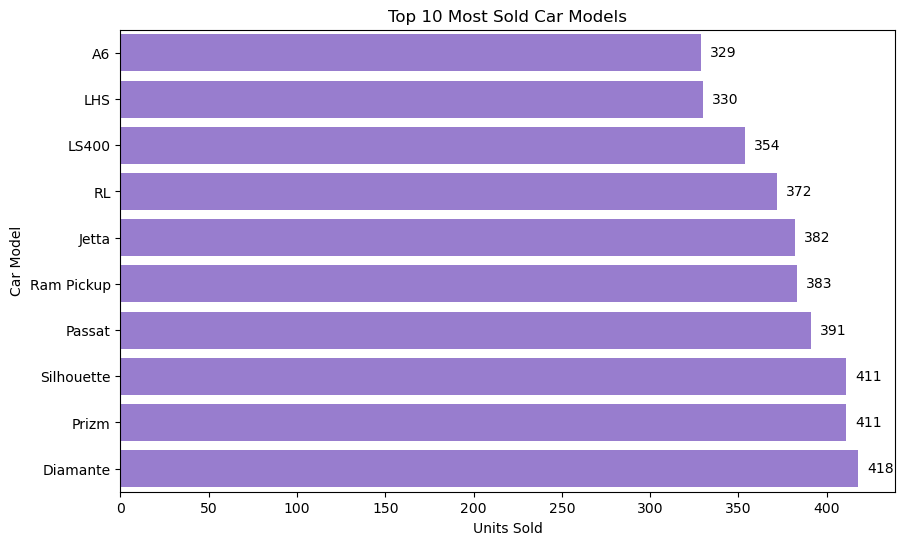

In [111]:
model_counts = df['Model'].value_counts().head(10).sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=model_counts.values, y=model_counts.index, color="mediumpurple")
for index, value in enumerate(model_counts.values):
    plt.text(value + 5, index, f"{value:,}", va='center')
plt.title("Top 10 Most Sold Car Models")
plt.xlabel("Units Sold")
plt.ylabel("Car Model")
plt.show()

#### Top 10 Most Sold Car by Company 

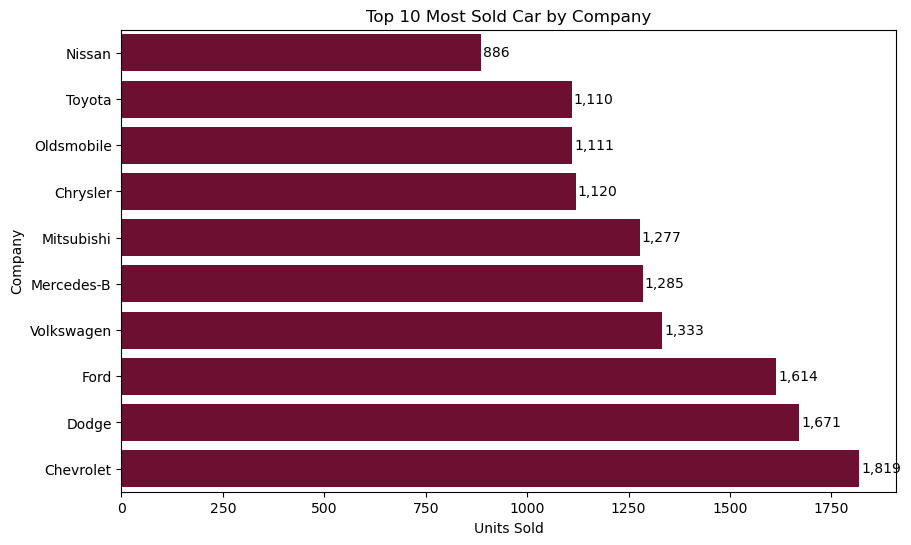

In [57]:
model_counts = df['Company'].value_counts().head(10).sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=model_counts.values, y=model_counts.index, color='#7B002C')
for index, value in enumerate(model_counts.values):
    plt.text(value + 5, index, f"{value:,}", va='center')  # format ribuan
plt.title("Top 10 Most Sold Car by Company")
plt.xlabel("Units Sold")
plt.ylabel("Company")
plt.show()

#### Top 10 Most Sold Car by Body Style

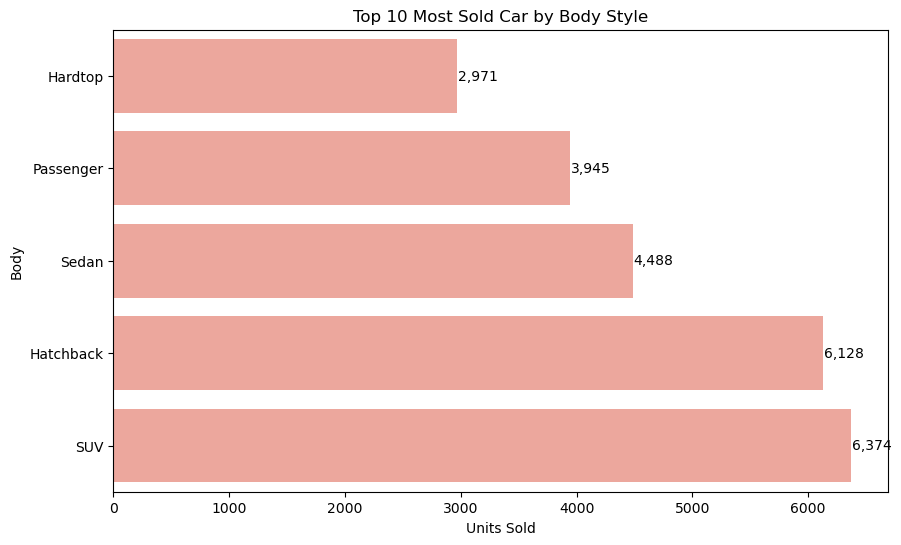

In [117]:
model_counts = df['Body Style'].value_counts().head(10).sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=model_counts.values, y=model_counts.index, color='#F99D90')
for index, value in enumerate(model_counts.values):
    plt.text(value + 5, index, f"{value:,}", va='center')  # format ribuan
plt.title("Top 10 Most Sold Car by Body Style")
plt.xlabel("Units Sold")
plt.ylabel("Body")
plt.show()

Insights:
1. SUV and Hatchback are the most sold by body styles, indicating strong customer preference for versatile, family-oriented vehicles
2. Ford, Dodge, and Chevrolet are the most total units sold, showing brand awareness and customer loyalty
3. Sillhoutte, Prizm, Diamant, reflecting a balance between practicality and affordability accross segments

#### C. Market Insights: Regional

#### Top 10 Most Sold Cars by Dealer Region

C:\Users\ROG\AppData\Local\Temp\ipykernel_23748\19653551.py:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x="Body Style", hue="Dealer_Region", palette = sns.color_palette("rocket"))


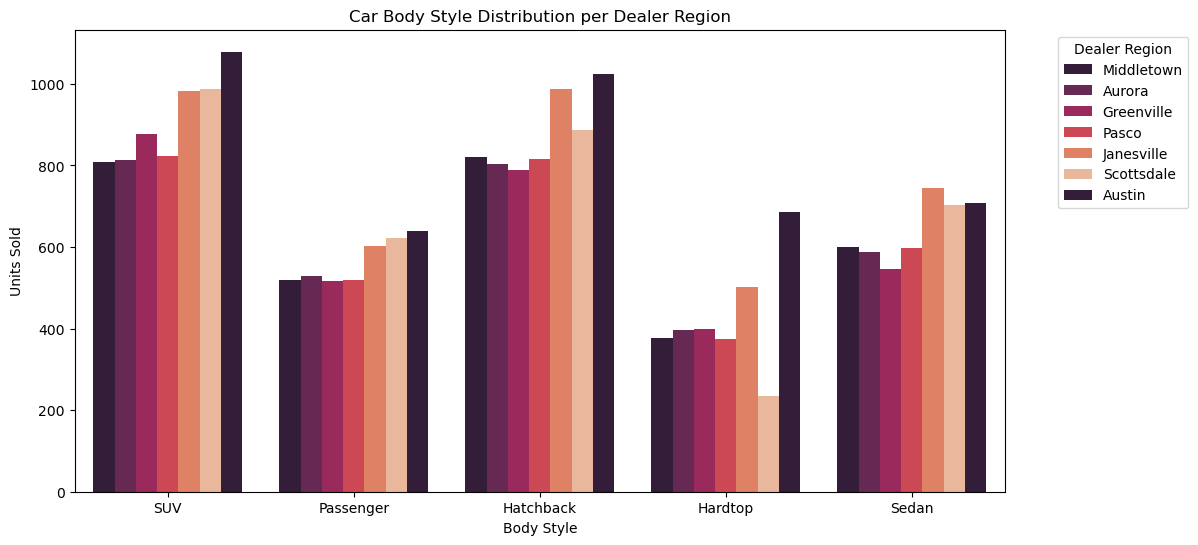

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Body Style", hue="Dealer_Region", palette = sns.color_palette("rocket"))
plt.title("Car Body Style Distribution per Dealer Region")
plt.xlabel("Body Style")
plt.ylabel("Units Sold")
plt.legend(title="Dealer Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Regional Share per Company

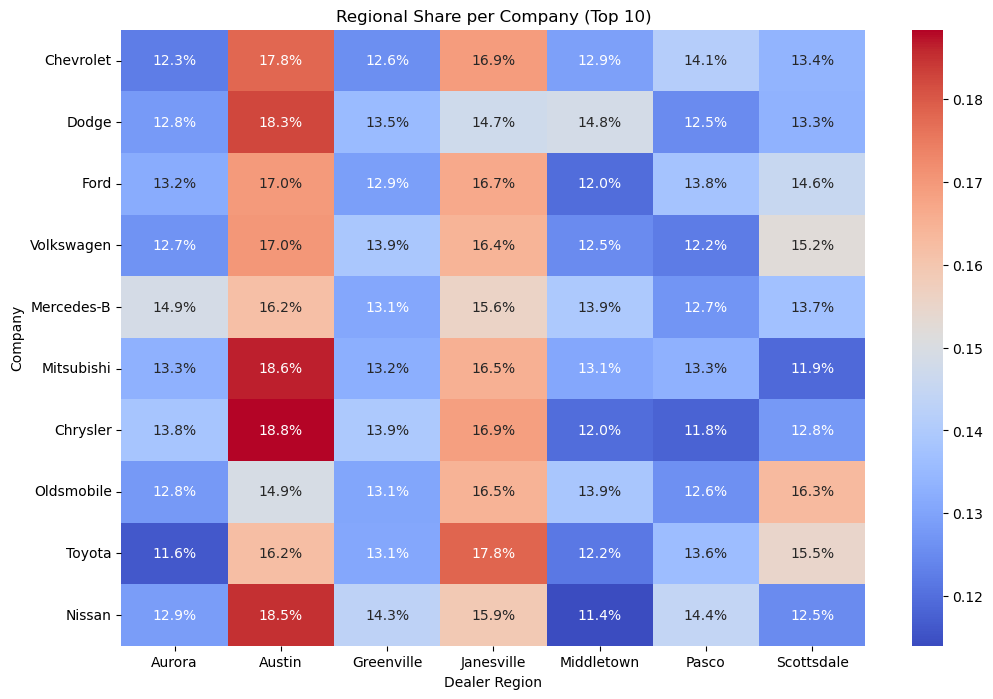

In [87]:
company_region = pd.crosstab(df["Company"], df["Dealer_Region"], normalize="index")
top_companies = df['Company'].value_counts().nlargest(10).index
plt.figure(figsize=(12,8))
sns.heatmap(company_region.loc[top_companies], annot=True, fmt=".1%", cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.title("Regional Share per Company (Top 10)")
plt.xlabel("Dealer Region")
plt.ylabel("Company")
plt.show()

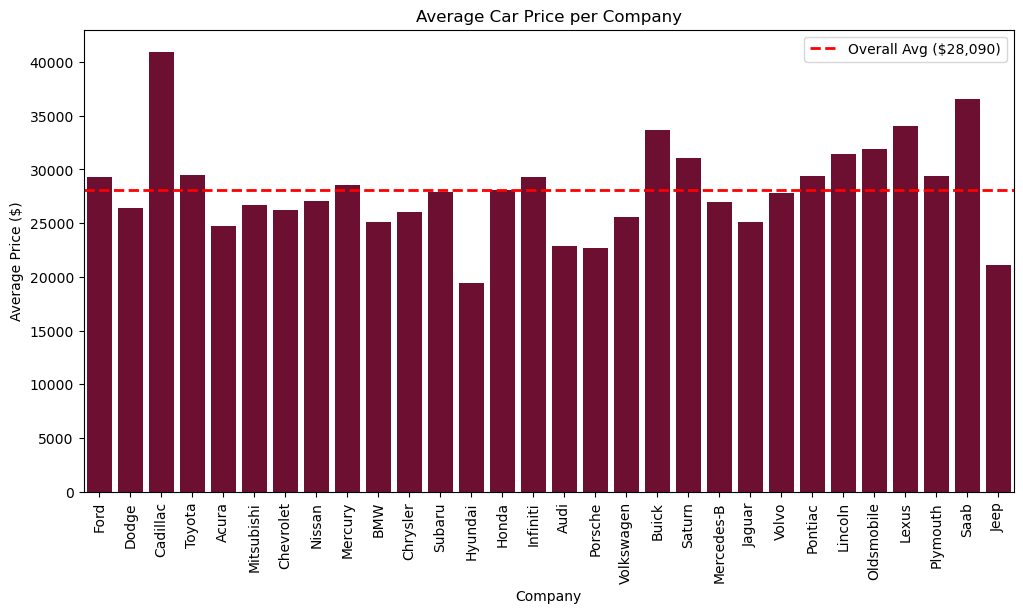

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Company", y="Price ($)", estimator=np.mean, errorbar=None, color='#7B002C')

# Hitung rata-rata global
avg_price = df["Price ($)"].mean()

# Tambahkan garis horizontal
plt.axhline(avg_price, color="red", linestyle="--", linewidth=2, label=f"Overall Avg (${avg_price:,.0f})")

plt.title("Average Car Price per Company")
plt.xlabel("Company")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)
plt.legend()
plt.show()

Insights:
1. Austin leads sales volume, dominated by SUVs, Hatchbacks, and Hardtops, indicating strong demand for multi-purpose vehicles.
2. Janesville shows higher Sedan preference, suggesting a more urban or commuter-oriented market profile.
3. Passenger cars maintain balanced sales across regions, reflecting consistent demand nationwide.
4. Regional share heavily concentrated in Austin, followed by Janesville, confirming their status as primary markets.
5. Average price tends to be higher in regions selling premium brands (Cadillac, Buick, Saturn, Lincoln, Oldsmobile, Lexus, Saab), showing a cluster of high-income customers there.

Key takeaway:
Austin and Janesville drive most of the national sales — Austin with diverse, high-volume demand, and Janesville leaning toward mid-to-premium sedan segments.

#### D. Sales Trend

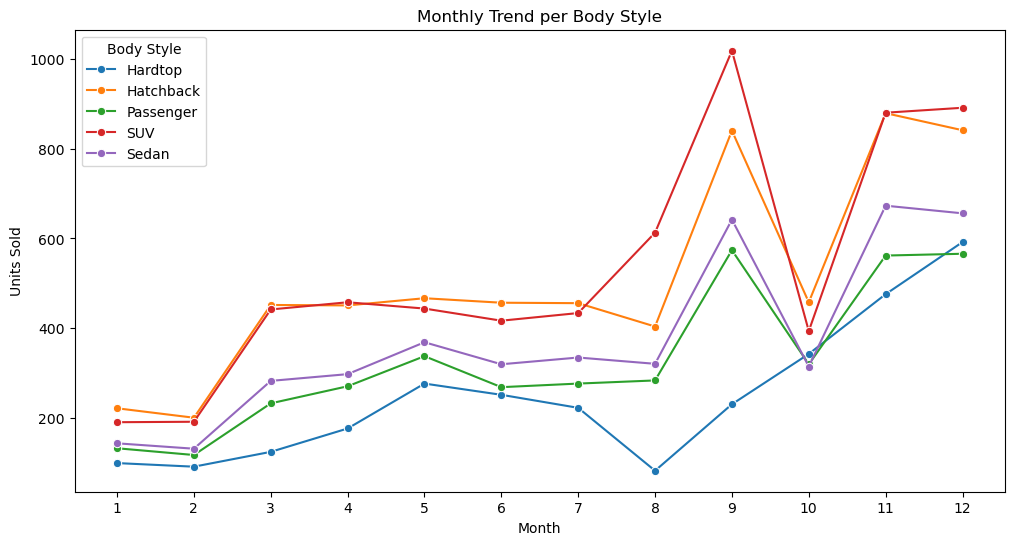

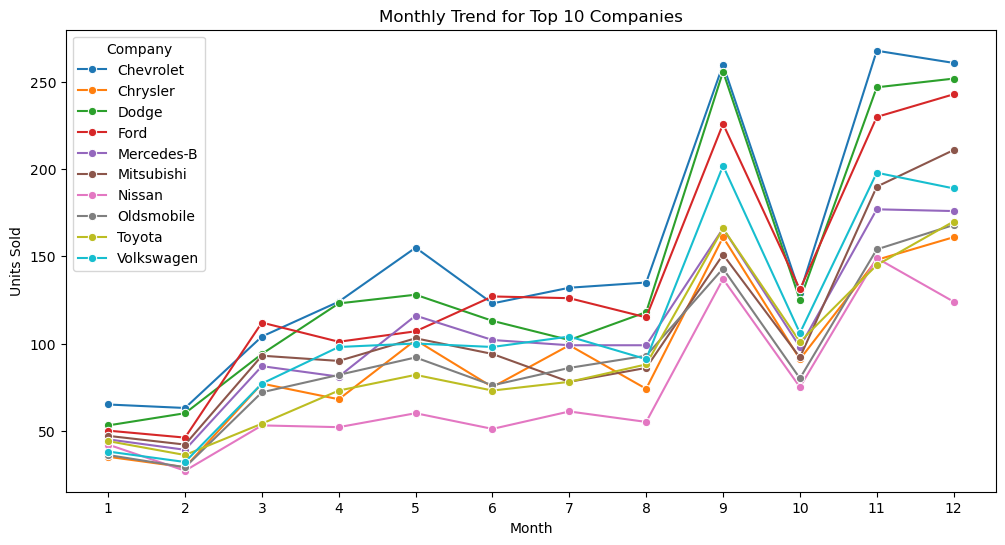

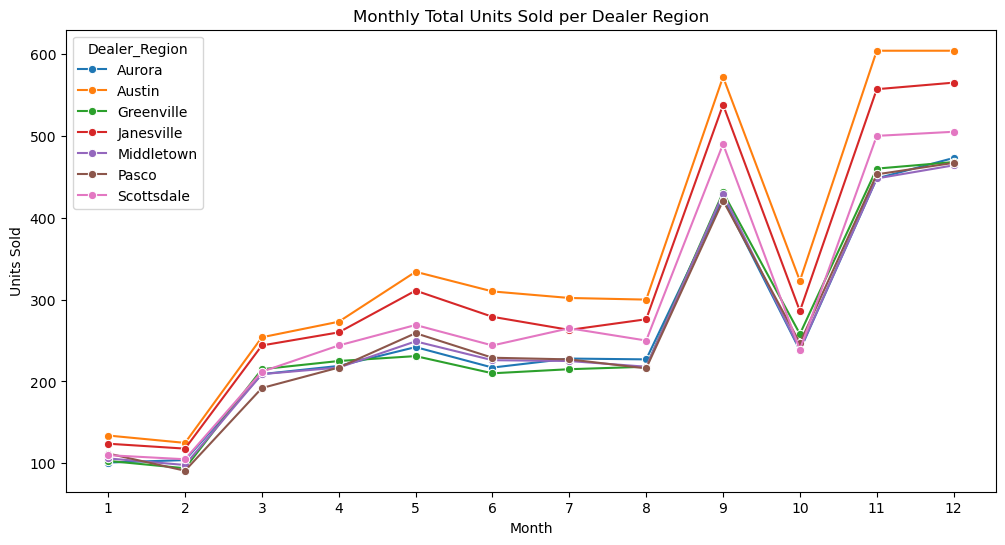

In [140]:
df['Month'] = df['Date'].dt.month

# Aggregate: total units sold per month per Body Style
monthly_body = df.groupby(['Month', 'Body Style'])['Car_id'].count().reset_index(name='Units Sold')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_body, x='Month', y='Units Sold', hue='Body Style', marker='o')
plt.title("Monthly Trend per Body Style")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(range(1,13))
plt.show()

# Agregate: total units sold per month per Company (Top 10)
company_total = df.groupby('Company')['Car_id'].count().reset_index(name='Total_Sold')

# Filter Top 10
top10_companies = company_total.sort_values('Total_Sold', ascending=False).head(10)['Company']
monthly_company = df.groupby(['Month', 'Company'])['Car_id'].count().reset_index(name='Units Sold')
monthly_company_top10 = monthly_company[monthly_company['Company'].isin(top10_companies)]

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_company_top10, x='Month', y='Units Sold', hue='Company', marker='o')
plt.title("Monthly Trend for Top 10 Companies")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(range(1,13))
plt.show()

# Agregate: total units sold per month per Region
monthly_region = df.groupby(['Month','Dealer_Region'])['Car_id'].count().reset_index(name='Units_Sold')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_region, x='Month', y='Units_Sold', hue='Dealer_Region', marker='o')
plt.title("Monthly Total Units Sold per Dealer Region")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(range(1,13))
plt.show()

Insights:
1. Sales peak in Q3-Q4, indicating seasonal buying momentum (pre-year-end promotions)

## MODEL DEVELOPMENT

### A. ARIMA MODEL

In [102]:
daily_sales = df.groupby('Date')['Car_id'].count().reset_index(name='sales')
weekly_sales = daily_sales.resample('W-MON', on='Date').sum().reset_index().sort_values('Date')
monthly_sales = daily_sales.resample('ME', on='Date').sum().reset_index().sort_values('Date')

print("Weekly sales shape:", weekly_sales.shape)
print("Monthly sales shape:", monthly_sales.shape)
print(weekly_sales.head())
print(monthly_sales.head())

Weekly sales shape: (105, 2)
Monthly sales shape: (24, 2)
        Date  sales
0 2022-01-03     55
1 2022-01-10     80
2 2022-01-17     70
3 2022-01-24     50
4 2022-01-31     60
        Date  sales
0 2022-01-31    315
1 2022-02-28    320
2 2022-03-31    705
3 2022-04-30    800
4 2022-05-31    750


In [104]:
top_models = df['Model'].value_counts().head(10).sort_values()
top_models

Model
A6            329
LHS           330
LS400         354
RL            372
Jetta         382
Ram Pickup    383
Passat        391
Silhouette    411
Prizm         411
Diamante      418
Name: count, dtype: int64

#### Plot Time Series (to see the trend and seasonality)

In [107]:
df['Month'] = df['Date'].dt.to_period('M')
top_models = df['Model'].value_counts().head(10).index.tolist()
df_top = df[df['Model'].isin(top_models)]
monthly_sales_model = df_top.groupby(['Month','Model']).size().reset_index(name='Sales')
monthly_sales_model['Month'] = monthly_sales_model['Month'].dt.to_timestamp()
monthly_sales_model.head(10)

,Month,Model,Sales
0,2022-01-01,A6,3
1,2022-01-01,Diamante,6
2,2022-01-01,Jetta,7
3,2022-01-01,LHS,3
4,2022-01-01,LS400,1
5,2022-01-01,Passat,6
6,2022-01-01,Prizm,4
7,2022-01-01,RL,6
8,2022-01-01,Ram Pickup,1
9,2022-01-01,Silhouette,6


In [109]:
monthly_sales_model

,Month,Model,Sales
0,2022-01-01,A6,3
1,2022-01-01,Diamante,6
2,2022-01-01,Jetta,7
3,2022-01-01,LHS,3
4,2022-01-01,LS400,1
...,...,...,...
235,2023-12-01,Passat,31
236,2023-12-01,Prizm,33
237,2023-12-01,RL,31
238,2023-12-01,Ram Pickup,29


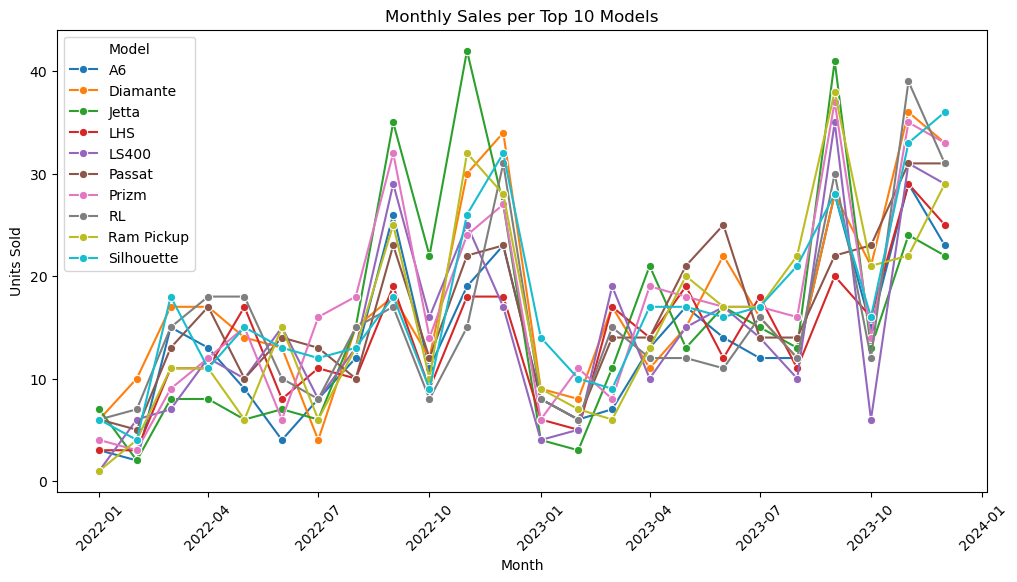

In [111]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales_model, x='Month', y='Sales', hue='Model', marker='o')
plt.title("Monthly Sales per Top 10 Models")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.show()

#### Augmented Dickey-Fuller (ADF) Test

In [114]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_sales_model['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.4604332237165627
p-value: 0.1254004771828015


#### Differencing Techniques

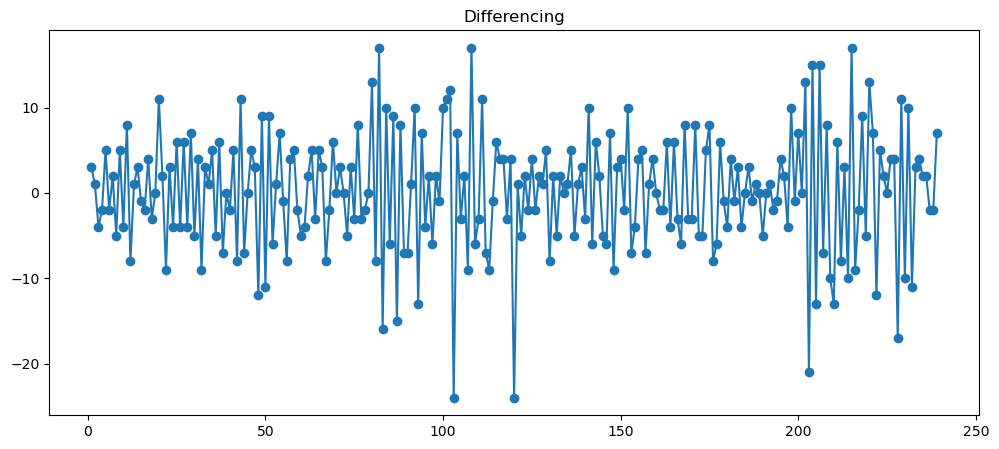

In [117]:
monthly_sales_model['sales_diff'] = monthly_sales_model['Sales'] - monthly_sales_model['Sales'].shift(1) 
monthly_sales_model['sales_diff'].dropna().plot(figsize=(12,5), marker='o') 
plt.title('Differencing') 
plt.show()

In [136]:
result = adfuller(monthly_sales_model['sales_diff'].dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.673074246485017
p-value: 1.2616744031995831e-16


p-value < 0.05 : data is stationer, d = 1 (for 1 time differencing)

#### p - order AR (Autoregressive) : PACF Plot
#### q - order MA (Moving Average) : ACF Plot

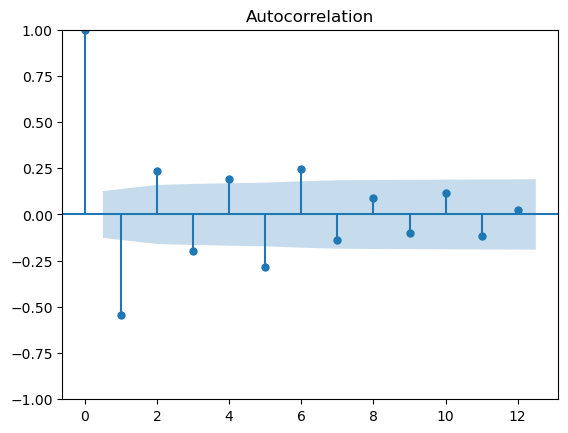

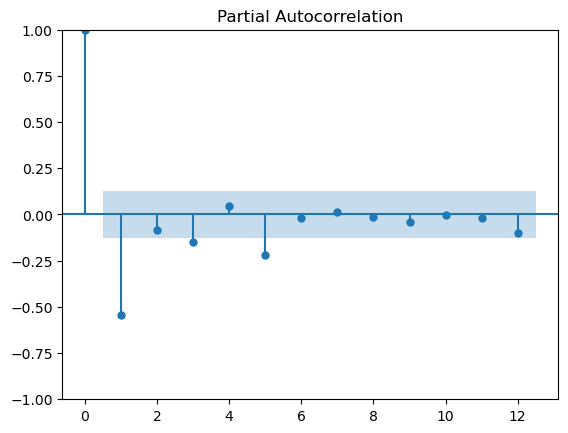

In [140]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF for MA
plot_acf(monthly_sales_model['sales_diff'].dropna(), lags=12)
plt.show()

# PACF for AR
plot_pacf(monthly_sales_model['sales_diff'].dropna(), lags=12)
plt.show()

In [223]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(monthly_sales_model['Sales'], 
                          start_p=0, start_q=0,
                          max_p=5, max_q=5, 
                          seasonal=False, 
                          d=1,        
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1610.584, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1528.954, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1530.504, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1608.677, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1529.112, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1527.426, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1519.837, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1529.997, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1521.565, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1525.624, Time=0.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1518.294, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1528.4

This model uses **AR lag of 4**, **1 differencing**, and **MA of 2**, without considering any seasonality. It’s suitable for a **non-seasonal series** but where there is autocorrelation across the last few lags.

In [142]:
from statsmodels.tsa.arima.model import ARIMA

# Top 10 models
top_models = monthly_sales_model['Model'].value_counts().head(10).index.tolist()
forecast_list = []

# Forecast horizon (period: next 6 months)
steps = 6  

for m in top_models:
    model_sales = monthly_sales_model[monthly_sales_model['Model']==m].set_index('Month')['Sales']
    
    # Fit ARIMA (misal order=(4,1,2))
    arima_model = ARIMA(model_sales, order=(4,1,2))
    arima_result = arima_model.fit()
    
    # Forecast
    forecast = arima_result.get_forecast(steps=steps)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Store in list
    temp_df = pd.DataFrame({
        'Month': forecast_mean.index,
        'Model': m,
        'Forecasted_Sales': forecast_mean.values,
        'Lower_CI': forecast_ci.iloc[:,0].values,
        'Upper_CI': forecast_ci.iloc[:,1].values
    })
    forecast_list.append(temp_df)
    
# Combine all models
forecast_df = pd.concat(forecast_list).reset_index(drop=True)
forecast_df

C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init

,Month,Model,Forecasted_Sales,Lower_CI,Upper_CI
0,2024-01-01,A6,21.926557,7.634931,36.218184
1,2024-02-01,A6,21.982002,6.540090,37.423913
2,2024-03-01,A6,21.678850,5.315979,38.041720
3,2024-04-01,A6,22.665510,5.769948,39.561073
4,2024-05-01,A6,22.538703,5.025591,40.051816
5,2024-06-01,A6,22.461045,4.024268,40.897822
6,2024-01-01,Diamante,26.088795,12.462640,39.714949
7,2024-02-01,Diamante,26.284269,10.963980,41.604558
8,2024-03-01,Diamante,23.786316,7.916615,39.656016
9,2024-04-01,Diamante,23.984495,5.635216,42.333774


In [144]:
# Round to unit
forecast_df['Forecasted_Sales'] = forecast_df['Forecasted_Sales'].round(0).astype('int64')
forecast_df['Lower_CI'] = forecast_df['Lower_CI'].round(0).astype('int64')
forecast_df['Upper_CI'] = forecast_df['Upper_CI'].round(0).astype('int64')

forecast_df

,Month,Model,Forecasted_Sales,Lower_CI,Upper_CI
0,2024-01-01,A6,22,8,36
1,2024-02-01,A6,22,7,37
2,2024-03-01,A6,22,5,38
3,2024-04-01,A6,23,6,40
4,2024-05-01,A6,23,5,40
5,2024-06-01,A6,22,4,41
6,2024-01-01,Diamante,26,12,40
7,2024-02-01,Diamante,26,11,42
8,2024-03-01,Diamante,24,8,40
9,2024-04-01,Diamante,24,6,42


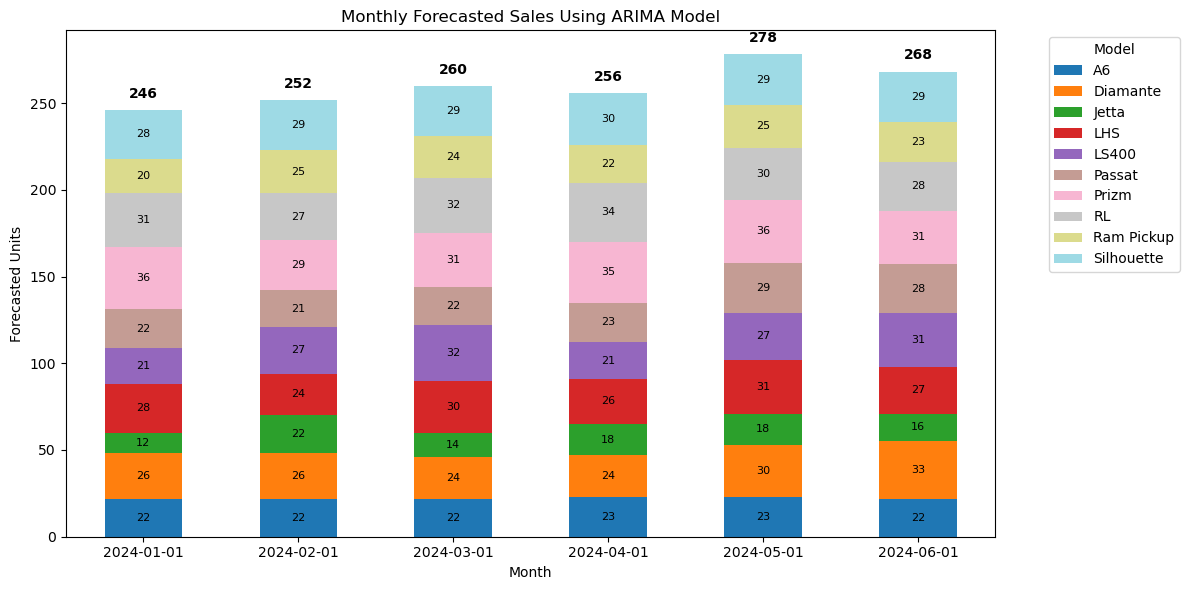

In [146]:
df_pivot_arima = forecast_df.pivot(index='Month', columns='Model', values='Forecasted_Sales').fillna(0)

ax = df_pivot_arima.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Monthly Forecasted Sales Using ARIMA Model")
plt.ylabel("Forecasted Units")
plt.xlabel("Month")
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8, color='black', fmt='%.0f')
totals = df_pivot_arima.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + total * 0.02, f'{int(total):,}', ha='center', va='bottom', 
            fontsize=10, fontweight='bold', color='black')

ax.set_xticklabels(df_pivot_arima.index.strftime('%Y-%m-%d'), rotation=0, ha='center')
plt.tight_layout()
plt.show()

#### Model Evaluation

In [148]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

monthly_sales_model['Month'] = pd.to_datetime(monthly_sales_model['Month'])
monthly_sales_model = monthly_sales_model.sort_values('Month')

top_models = monthly_sales_model.groupby('Model')['Sales'].sum().sort_values(ascending=False).head(10).index.tolist()

metrics_list = []

for m in top_models:
    model_sales = monthly_sales_model[monthly_sales_model['Model']==m].set_index('Month')['Sales']
    
    # Manual train/test split
    train = model_sales['2022-01-01':'2023-06-30']  # 18 months
    test  = model_sales['2023-07-01':'2023-12-31']  # 6 months
    
    # Fit ARIMA (order example (4,1,2))
    try:
        arima_model = ARIMA(train, order=(4,1,2))
        arima_result = arima_model.fit()
        
        # Forecast 
        forecast = arima_result.get_forecast(steps=len(test))
        forecast_mean = forecast.predicted_mean
        
        # Model evaluation
        mae = mean_absolute_error(test, forecast_mean)
        rmse = mean_squared_error(test, forecast_mean, squared=False)
        mape = (abs(test - forecast_mean)/test).mean() * 100
        
    except Exception as e:
        print(f"Model {m} failed: {e}")
        mae = rmse = mape = None
    
    metrics_list.append({
        'Model ARIMA': m,
        'MAE ARIMA': mae,
        'RMSE ARIMA': rmse,
        'MAPE (%) ARIMA': mape
    })

# Combine to dataframe
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='MAPE (%) ARIMA') 
metrics_df

C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ROG\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.

,Model ARIMA,MAE ARIMA,RMSE ARIMA,MAPE (%) ARIMA
8,LHS,6.495577,8.141337,28.553765
5,Jetta,8.345823,12.440651,29.762136
9,A6,7.600956,10.290955,29.796468
1,Prizm,10.782263,14.693722,32.177673
3,Passat,7.732159,8.600525,32.569593
0,Diamante,9.442850,12.038342,32.824460
6,RL,10.664558,14.516656,34.546776
4,Ram Pickup,10.295829,13.039126,36.287557
2,Silhouette,12.691949,15.004906,45.355664
7,LS400,11.670968,13.425520,57.995421


In [149]:
# Round to 2 decimals
metrics_df[['MAE ARIMA', 'RMSE ARIMA', 'MAPE (%) ARIMA']] = metrics_df[['MAE ARIMA', 'RMSE ARIMA', 'MAPE (%) ARIMA']].round(2)
metrics_df = metrics_df.sort_values(by='MAPE (%) ARIMA')  
metrics_df

,Model ARIMA,MAE ARIMA,RMSE ARIMA,MAPE (%) ARIMA
8,LHS,6.50,8.14,28.55
5,Jetta,8.35,12.44,29.76
9,A6,7.60,10.29,29.80
1,Prizm,10.78,14.69,32.18
3,Passat,7.73,8.60,32.57
0,Diamante,9.44,12.04,32.82
6,RL,10.66,14.52,34.55
4,Ram Pickup,10.30,13.04,36.29
2,Silhouette,12.69,15.00,45.36
7,LS400,11.67,13.43,58.00


Insights:

Model validation was performed through out-of-sample backtesting using recent historical data (Jul-Dec 2023). Given the presence of seasonal peaks in Q3-Q4 (esp. Sep, Nov, Dec), this backtesting provides an approximate benchmark for the expected forecast deviation in the Jan-Jul 2024 projections.

## PROPHET MODEL

In [119]:
from prophet import Prophet

forecast_list_prophet = []

# Forecast horizon (period: next 6 months)
steps = 6  

for m in top_models:
    df_model = monthly_sales_model[monthly_sales_model['Model']==m][['Month','Sales']].rename(columns={'Month':'ds','Sales':'y'})
    
    # Fit Prophet
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df_model)
    
    # Create future dataframe
    future = model.make_future_dataframe(periods=steps, freq='MS')
    
    # Forecast
    forecast = model.predict(future)
    
    # Store relevant columns
    temp_df = forecast[['ds','yhat','yhat_lower','yhat_upper']].copy()
    temp_df['Model'] = m

    temp_df['yhat'] = temp_df['yhat'].clip(lower=0)
    temp_df['yhat_lower'] = temp_df['yhat_lower'].clip(lower=0)
    temp_df['yhat_upper'] = temp_df['yhat_upper'].clip(lower=0)
    forecast_list_prophet.append(temp_df)

# Combine all models
forecast_prophet = pd.concat(forecast_list_prophet).reset_index(drop=True)

# Optional: round forecasted sales to integer
forecast_prophet['yhat'] = forecast_prophet['yhat'].round(0).astype(int)
forecast_prophet['yhat_lower'] = forecast_prophet['yhat_lower'].round(0).astype(int)
forecast_prophet['yhat_upper'] = forecast_prophet['yhat_upper'].round(0).astype(int)

# Rename columns
forecast_prophet = forecast_prophet.rename(columns={'yhat':'Forecasted_Sales','yhat_lower':'Lower_CI','yhat_upper':'Upper_CI','ds':'Month'})

forecast_prophet

09:15:44 - cmdstanpy - INFO - Chain [1] start processing
09:15:46 - cmdstanpy - INFO - Chain [1] done processing
09:15:46 - cmdstanpy - INFO - Chain [1] start processing
09:15:54 - cmdstanpy - INFO - Chain [1] done processing
09:15:54 - cmdstanpy - INFO - Chain [1] start processing
09:16:02 - cmdstanpy - INFO - Chain [1] done processing
09:16:02 - cmdstanpy - INFO - Chain [1] start processing
09:16:10 - cmdstanpy - INFO - Chain [1] done processing
09:16:10 - cmdstanpy - INFO - Chain [1] start processing
09:16:10 - cmdstanpy - INFO - Chain [1] done processing
09:16:10 - cmdstanpy - INFO - Chain [1] start processing
09:16:10 - cmdstanpy - INFO - Chain [1] done processing
09:16:10 - cmdstanpy - INFO - Chain [1] start processing
09:16:18 - cmdstanpy - INFO - Chain [1] done processing
09:16:18 - cmdstanpy - INFO - Chain [1] start processing
09:16:26 - cmdstanpy - INFO - Chain [1] done processing
09:16:26 - cmdstanpy - INFO - Chain [1] start processing
09:16:34 - cmdstanpy - INFO - Chain [1]

,Month,Forecasted_Sales,Lower_CI,Upper_CI,Model
0,2022-01-01,6,6,6,Diamante
1,2022-02-01,10,10,10,Diamante
2,2022-03-01,17,17,17,Diamante
3,2022-04-01,17,17,17,Diamante
4,2022-05-01,14,14,14,Diamante
...,...,...,...,...,...
295,2024-02-01,14,14,14,A6
296,2024-03-01,39,39,39,A6
297,2024-04-01,25,24,25,A6
298,2024-05-01,7,7,8,A6


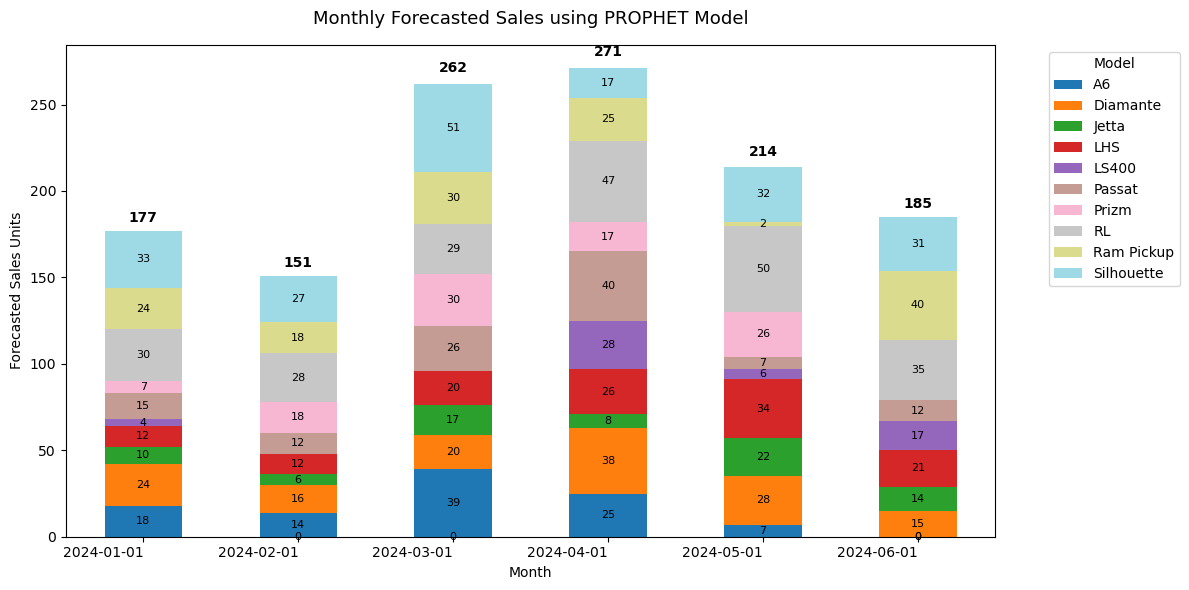

In [121]:
future_trend = forecast_prophet[forecast_prophet['Month'] > monthly_sales_model['Month'].max()]

# Pivot data per month per model
df_pivot_prophet = future_trend.pivot(
    index='Month', columns='Model', values='Forecasted_Sales'
).fillna(0)

# Create figure
ax = df_pivot_prophet.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)

ax.set_xticklabels(df_pivot_prophet.index.strftime('%Y-%m-%d'), rotation=0, ha='right')

plt.title("Monthly Forecasted Sales using PROPHET Model", fontsize=13, pad=15)
plt.ylabel("Forecasted Sales Units")
plt.xlabel("Month")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='center', fontsize=8, color='black')
totals = df_pivot_prophet.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, total + total * 0.02, f'{int(total):,}', ha='center', va='bottom', 
            fontsize=10, fontweight='bold', color='black')

plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [162]:
metrics_list_prophet= []

for m in top_models:

    # Prepare model-specific dataframe
    df_model = monthly_sales_model[monthly_sales_model['Model']==m][['Month','Sales']].rename(columns={'Month':'ds','Sales':'y'})
    df_model['ds'] = pd.to_datetime(df_model['ds'])

    # Manual train/test split using df_model
    train = df_model[(df_model['ds'] >= '2022-01-01') & (df_model['ds'] <= '2023-06-30')].copy()
    test  = df_model[(df_model['ds'] >= '2023-07-01') & (df_model['ds'] <= '2023-12-31')].copy()

    # Fit Prophet
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(train)
    
    # Forecast
    future = model.make_future_dataframe(periods=len(test), freq='MS')
    forecast = model.predict(future)
    
    # Merge forecast and test
    forecast_test = forecast[['ds','yhat']].merge(test[['ds','y']], on='ds')
    
    # Metrics
    mae = mean_absolute_error(forecast_test['y'], forecast_test['yhat'])
    rmse = mean_squared_error(forecast_test['y'], forecast_test['yhat'], squared=False)
    mape = (abs(forecast_test['y'] - forecast_test['yhat']) / np.where(forecast_test['y']==0, 1, forecast_test['y'])).mean() * 100
    
    metrics_list_prophet.append({
        'Model Prophet': m,
        'MAE Prophet': mae,
        'RMSE Prophet': rmse,
        'MAPE (%) Prophet': mape
    })

metrics_df_prophet = pd.DataFrame(metrics_list_prophet).sort_values(by='MAPE (%) Prophet')
metrics_df_prophet

19:54:06 - cmdstanpy - INFO - Chain [1] start processing
19:54:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ROG\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
19:54:12 - cmdstanpy - INFO - Chain [1] start processing
19:54:13 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ROG\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
19:54:13 - cmdstanpy - INFO - Chain [1] start processing
19:54:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ROG\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will

,Model Prophet,MAE Prophet,RMSE Prophet,MAPE (%) Prophet
8,LHS,3.960581,4.464738,22.029315
9,A6,4.655353,5.180048,23.215934
4,Ram Pickup,6.392248,7.671897,26.696966
7,LS400,6.069457,7.272996,40.993589
0,Diamante,10.361944,11.276104,42.829873
6,RL,10.146775,12.434131,46.379159
3,Passat,9.853994,11.012878,52.140706
1,Prizm,10.872830,13.305684,54.605700
2,Silhouette,12.477634,16.094082,62.373650
5,Jetta,13.516496,18.140822,69.864937


In [164]:
# Round to 2 decimals
metrics_df_prophet[['MAE Prophet', 'RMSE Prophet', 'MAPE (%) Prophet']] = metrics_df_prophet[['MAE Prophet', 'RMSE Prophet', 'MAPE (%) Prophet']].round(2)
metrics_df_prophet = metrics_df_prophet.sort_values(by='MAPE (%) Prophet')  
metrics_df_prophet

,Model Prophet,MAE Prophet,RMSE Prophet,MAPE (%) Prophet
8,LHS,3.96,4.46,22.03
9,A6,4.66,5.18,23.22
4,Ram Pickup,6.39,7.67,26.70
7,LS400,6.07,7.27,40.99
0,Diamante,10.36,11.28,42.83
6,RL,10.15,12.43,46.38
3,Passat,9.85,11.01,52.14
1,Prizm,10.87,13.31,54.61
2,Silhouette,12.48,16.09,62.37
5,Jetta,13.52,18.14,69.86


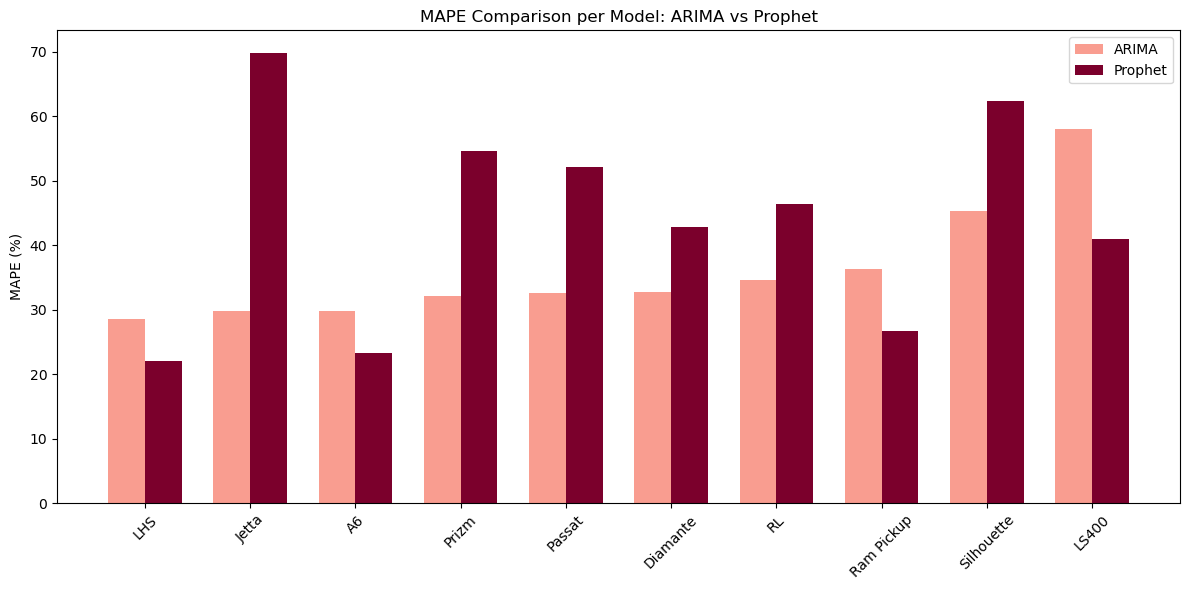

In [170]:
# Combine ARIMA & Prophet Dataframe
comparison = metrics_df.merge(
    metrics_df_prophet,
    left_on="Model ARIMA", 
    right_on="Model Prophet"
)

comparison = comparison.drop(columns=["Model Prophet"]).rename(columns={"Model ARIMA": "Model"})

fig, ax = plt.subplots(figsize=(12,6))
x = range(len(comparison))  
bar_width = 0.35
ax.bar([i - bar_width/2 for i in x], comparison['MAPE (%) ARIMA'], 
       width=bar_width, color='#F99D90', label='ARIMA')
ax.bar([i + bar_width/2 for i in x], comparison['MAPE (%) Prophet'], 
       width=bar_width, color='#7B002C', label='Prophet')

ax.set_xticks(x)
ax.set_xticklabels(comparison['Model'], rotation=45)
ax.set_ylabel("MAPE (%)")
ax.set_title("MAPE Comparison per Model: ARIMA vs Prophet")
ax.legend()

plt.tight_layout()
plt.show()

In [297]:
comparison.head(10)

,Model,MAE ARIMA,RMSE ARIMA,MAPE (%) ARIMA,MAE Prophet,RMSE Prophet,MAPE (%) Prophet
0,LHS,6.50,8.14,28.55,3.96,4.46,22.03
1,Jetta,8.35,12.44,29.76,13.52,18.14,69.86
2,A6,7.60,10.29,29.80,4.66,5.18,23.22
3,Prizm,10.78,14.69,32.18,10.87,13.31,54.61
4,Passat,7.73,8.60,32.57,9.85,11.01,52.14
5,Diamante,9.44,12.04,32.82,10.36,11.28,42.83
6,RL,10.66,14.52,34.55,10.15,12.43,46.38
7,Ram Pickup,10.30,13.04,36.29,6.39,7.67,26.70
8,Silhouette,12.69,15.00,45.36,12.48,16.09,62.37
9,LS400,11.67,13.43,58.00,6.07,7.27,40.99


### Define the Best Fit Model

In [174]:
# Parameter : Lowest MAPE (%)
best_method = []

for m in top_models:
    arima_mape = metrics_df.loc[metrics_df['Model ARIMA'] == m, 'MAPE (%) ARIMA'].values[0]
    prophet_mape = metrics_df_prophet.loc[metrics_df_prophet['Model Prophet'] == m, 'MAPE (%) Prophet'].values[0]
    
    if arima_mape <= prophet_mape:
        best_method.append({'Model': m, 'Method': 'ARIMA'})
    else:
        best_method.append({'Model': m, 'Method': 'Prophet'})

best_method_df = pd.DataFrame(best_method)

# Choose the forecasted number from chosen method
final_forecast_list = []

for idx, row in best_method_df.iterrows():
    m = row['Model']
    method = row['Method']
    
    if method == 'ARIMA':
        temp = forecast_df[forecast_df['Model'] == m].copy()
    else:
        temp = forecast_prophet[forecast_prophet['Model'] == m].copy()
        
    temp['Method'] = method  
    final_forecast_list.append(temp)

# Combine as Final Forecast
FINAL_FORECAST = pd.concat(final_forecast_list).reset_index(drop=True)
pd.set_option('display.max_rows', None)

FINAL_FORECAST.round()

,Month,Model,Forecasted_Sales,Lower_CI,Upper_CI,Method
0,2024-01-01,Diamante,26,12,40,ARIMA
1,2024-02-01,Diamante,26,11,42,ARIMA
2,2024-03-01,Diamante,24,8,40,ARIMA
3,2024-04-01,Diamante,24,6,42,ARIMA
4,2024-05-01,Diamante,30,11,50,ARIMA
5,2024-06-01,Diamante,33,13,53,ARIMA
6,2024-01-01,Prizm,36,21,52,ARIMA
7,2024-02-01,Prizm,29,13,46,ARIMA
8,2024-03-01,Prizm,31,12,50,ARIMA
9,2024-04-01,Prizm,35,14,56,ARIMA


### Final Forecast (Period : Next 6 Months)

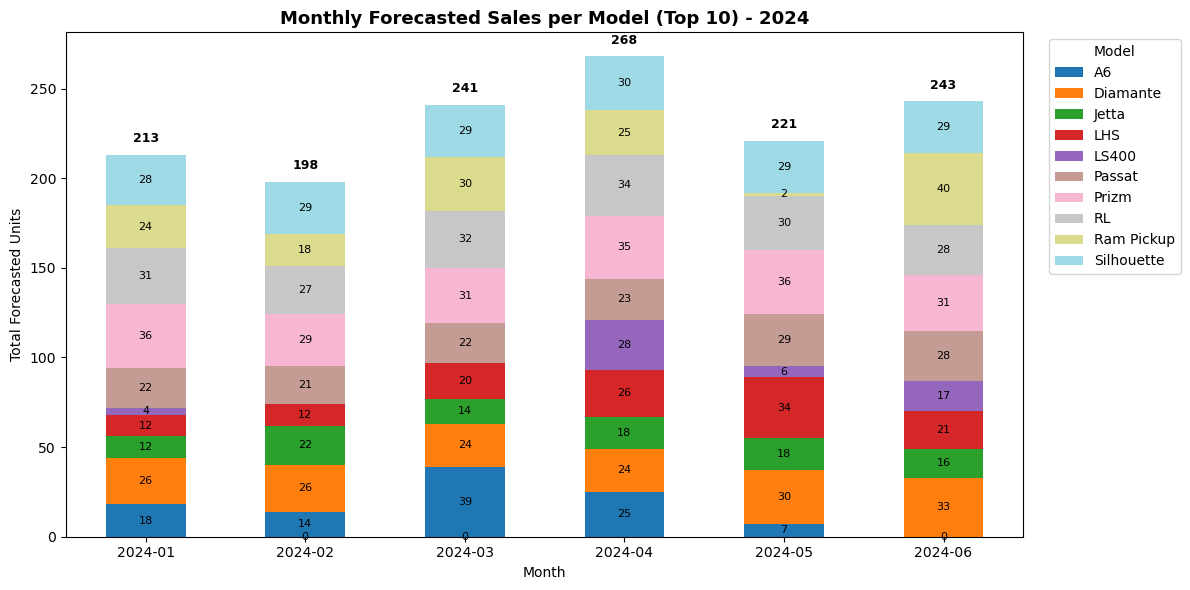

In [180]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure datetime type
FINAL_FORECAST['Month'] = pd.to_datetime(FINAL_FORECAST['Month'])

# Filter year 2024
df_2024 = FINAL_FORECAST[FINAL_FORECAST['Month'].dt.year == 2024]

# Select top 10 models
top_models = df_2024['Model'].unique()[:10]
df_plot = df_2024[df_2024['Model'].isin(top_models)].copy()

# Pivot for stacked bar
df_pivot = df_plot.pivot_table(
    index='Month', 
    columns='Model', 
    values='Forecasted_Sales', 
    aggfunc='sum'
).fillna(0)

df_pivot.index = df_pivot.index.strftime('%Y-%m')

# Plot stacked bar
ax = df_pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12,6), 
    colormap='tab20', 
    edgecolor='none'
)

# Add labels inside each stack segment
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f', fontsize=8, color='black')

# Add cumulative total labels on top of bars
totals = df_pivot.sum(axis=1)
for idx, total in enumerate(totals):
    ax.text(idx, total + totals.max()*0.02, f'{int(total)}', 
            ha='center', va='bottom', fontweight='bold', fontsize=9)

# Style and labels
plt.ylabel('Total Forecasted Units')
plt.xlabel('Month')
plt.title('Monthly Forecasted Sales per Model (Top 10) - 2024', fontsize=13, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()